<a href="https://colab.research.google.com/github/Parvathiattoor/Project/blob/main/first.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # model split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [23]:
df = pd.read_csv('http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz')

In [24]:
df=df.sample(n=200000,random_state=123,ignore_index=True)

In [6]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf.
1,0,tcp,http,SF,237,3513,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,normal.
2,0,tcp,private,S0,0,0,0,0,0,0,...,18,0.07,0.08,0.00,0.00,1.0,1.0,0.0,0.0,neptune.
3,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.06,0.00,0.00,1.0,1.0,0.0,0.0,neptune.
4,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,icmp,ecr_i,SF,520,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf.
199996,0,icmp,ecr_i,SF,520,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf.
199997,0,tcp,private,S0,0,0,0,0,0,0,...,1,0.00,0.05,0.00,0.00,1.0,1.0,0.0,0.0,neptune.
199998,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf.


In [25]:
df.columns = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'outcome'
]

# display 5 rows
df[0:19289]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf.
1,0,tcp,http,SF,237,3513,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,normal.
2,0,tcp,private,S0,0,0,0,0,0,0,...,18,0.07,0.08,0.00,0.00,1.0,1.0,0.0,0.0,neptune.
3,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.06,0.00,0.00,1.0,1.0,0.0,0.0,neptune.
4,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19284,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf.
19285,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf.
19286,0,tcp,http,SF,270,6318,0,0,0,0,...,255,1.00,0.00,0.01,0.04,0.0,0.0,0.0,0.0,normal.
19287,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf.


In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
1,0,tcp,http,SF,237,3513,0,0,0,0,...,255,1.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,private,S0,0,0,0,0,0,0,...,18,0.07,0.08,0.0,0.0,1.0,1.0,0.0,0.0,neptune.
3,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.06,0.0,0.0,1.0,1.0,0.0,0.0,neptune.
4,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.


In [ ]:
(df['service'].value_counts())

ecr_i      113774
private     44874
http        26135
smtp         3986
other        2970
            ...  
exec           30
IRC            13
urh_i           7
X11             2
tim_i           2
Name: service, Length: 63, dtype: int64

In [ ]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494020.000000,4.940200e+05,4.940200e+05,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,...,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000
mean,47.979400,3.025616e+03,8.685232e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148245,0.010212,...,232.471230,188.666034,0.753779,0.030906,0.601936,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.747185,9.882191e+05,3.304003e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355343,1.798328,...,64.744665,106.040236,0.410781,0.109259,0.481309,0.042133,0.380593,0.380920,0.230590,0.230141
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  object 
 2   service                      494020 non-null  object 
 3   flag                         494020 non-null  object 
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  num_compromised              494020 non-null  int64  
 13 

In [ ]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494020.000000,4.940200e+05,4.940200e+05,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,...,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000
mean,47.979400,3.025616e+03,8.685232e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148245,0.010212,...,232.471230,188.666034,0.753779,0.030906,0.601936,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.747185,9.882191e+05,3.304003e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355343,1.798328,...,64.744665,106.040236,0.410781,0.109259,0.481309,0.042133,0.380593,0.380920,0.230590,0.230141
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
df.drop(['num_outbound_cmds'], axis=1, inplace=True)  #preprocessing

In [27]:
(df['outcome'].value_counts())

smurf.              113529
neptune.             43417
normal.              39566
back.                  889
satan.                 628
ipsweep.               472
portsweep.             424
warezclient.           423
teardrop.              392
pod.                   104
nmap.                   95
guess_passwd.           21
land.                    8
buffer_overflow.         8
imap.                    7
ftp_write.               4
phf.                     4
rootkit.                 4
loadmodule.              3
multihop.                1
warezmaster.             1
Name: outcome, dtype: int64

In [28]:
value_counts = df['outcome'].value_counts()

# Get the labels with value counts less than 50
labels_to_delete = value_counts[value_counts < 50].index

# Filter the DataFrame to keep only the rows with labels not in labels_to_delete
filtered_df = df[~df['outcome'].isin(labels_to_delete)]

In [29]:
(filtered_df['outcome'].value_counts())

smurf.          113529
neptune.         43417
normal.          39566
back.              889
satan.             628
ipsweep.           472
portsweep.         424
warezclient.       423
teardrop.          392
pod.               104
nmap.               95
Name: outcome, dtype: int64

In [7]:
for f in range(0,10):
    df = df.iloc[np.random.permutation(len(df))]

In [30]:
from sklearn.preprocessing import LabelEncoder
x = filtered_df.drop('outcome', axis = 1)
y = filtered_df['outcome']
label_encoder = LabelEncoder()

# Fit label encoder and transform target variable
y = label_encoder.fit_transform(y)
y

array([8, 4, 2, ..., 2, 8, 4])

In [31]:
x.shape

(199939, 40)

In [32]:
y.shape

(199939,)

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    RobustScaler,
    StandardScaler,
)
categorical_columns = ["protocol_type", "service", "flag"]

ordinal_encoder = OrdinalEncoder(
    handle_unknown="use_encoded_value", unknown_value=-1
)
preprocessor = ColumnTransformer(
    transformers=[
        ("categorical", ordinal_encoder, categorical_columns),
    ],
    remainder="passthrough",
)
x = preprocessor.fit_transform(x)



In [34]:
x.shape

(199939, 40)

In [35]:
y.shape

(199939,)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x ,y , test_size = 0.2, random_state = 42)

In [37]:
y_train

array([8, 8, 8, ..., 8, 8, 2])

In [38]:
y_train.shape

(159951,)

In [39]:
x_train.shape

(159951, 40)

In [40]:
x_test.shape

(39988, 40)

In [41]:
y_train_series = pd.Series(y_train)


In [42]:
count = y_train_series.value_counts()
count

8     90981
2     34703
4     31549
0       695
7       494
1       374
6       341
10      341
9       314
5        83
3        76
dtype: int64

In [45]:
from imblearn.under_sampling import RandomUnderSampler
x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)
train_data = pd.concat([x_train, y_train], axis=1)

# Separate the majority and minority classes
majority_class = train_data[train_data['outcome'] == 'majority_class']
minority_class = train_data[train_data['outcome'] == 'minority_class']

# Undersample the majority class to have a maximum of 1000 samples
undersampled_majority = resample(majority_class, replace=False, n_samples=1000, random_state=42)

# Combine the undersampled majority class with the minority class
undersampled_train_data = pd.concat([undersampled_majority, minority_class])

# Shuffle the undersampled training data
undersampled_train_data = undersampled_train_data.sample(frac=1, random_state=42)

# Separate features and labels again
x_train_undersampled = undersampled_train_data.drop('target_column', axis=1)
y_train_undersampled = undersampled_train_data['target_column']


KeyError: 'outcome'

In [18]:
x_train_resampled.shape

(21, 41)

In [19]:
y_train_resampled.shape

(21,)

In [ ]:
y_test.shape

(98804,)

In [15]:
iforest = IsolationForest(n_estimators=100, bootstrap=True, random_state=42)
iforest.fit(x_train,y_train)
y_pred1 = iforest.predict(x_test)
y_pred1 = np.where(y_pred1 == 1, 1, 0) # normal = 1, anomaly = 0
y_pred2 = iforest.decision_function(x_test) # negative : outliers, positive : inliers

In [ ]:
y_pred1[20:30]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
y_pred2

array([0.0679621 , 0.14515749, 0.17211448, ..., 0.17211448, 0.1002014 ,
       0.17211448])

In [ ]:
y_test

array([1, 0, 0, ..., 0, 0, 0])

In [20]:
from sklearn.metrics import classification_report
print("Printing the classification report with fixed parameters...")
print(classification_report(y_test, y_pred1))

Printing the classification report with fixed parameters...
              precision    recall  f1-score   support

           0       0.03      1.00      0.06       167
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00        93
           6       0.00      0.00      0.00         1
           9       0.00      0.00      0.00      8558
          10       0.00      0.00      0.00        19
          11       0.00      0.00      0.00      7949
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00        25
          14       0.00      0.00      0.00        75
          16       0.00      0.00      0.00       135
          17       0.00      0.00      0.00     22803
          18       0.00      0.00      0.00        78
          19       0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import math
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
curve = RocCurveDisplay(fpr=fpr, tpr=tpr,roc_auc=roc_auc)
curve.plot()
plt.title("IForest for OCC on KDD cup 1999")
plt.show()

ValueError: multiclass format is not supported

In [ ]:
from sklearn.metrics import roc_auc_score
auc1 = roc_auc_score(y_test, y_pred1)
auc2 = roc_auc_score(y_test, y_pred2)
print("AUC score (discrete prediction): ", auc1 * 100)
print("AUC score (continuous prediction):", auc2 * 100)

AUC score (discrete prediction):  41.7847420675973
AUC score (continuous prediction): 21.744339389511296


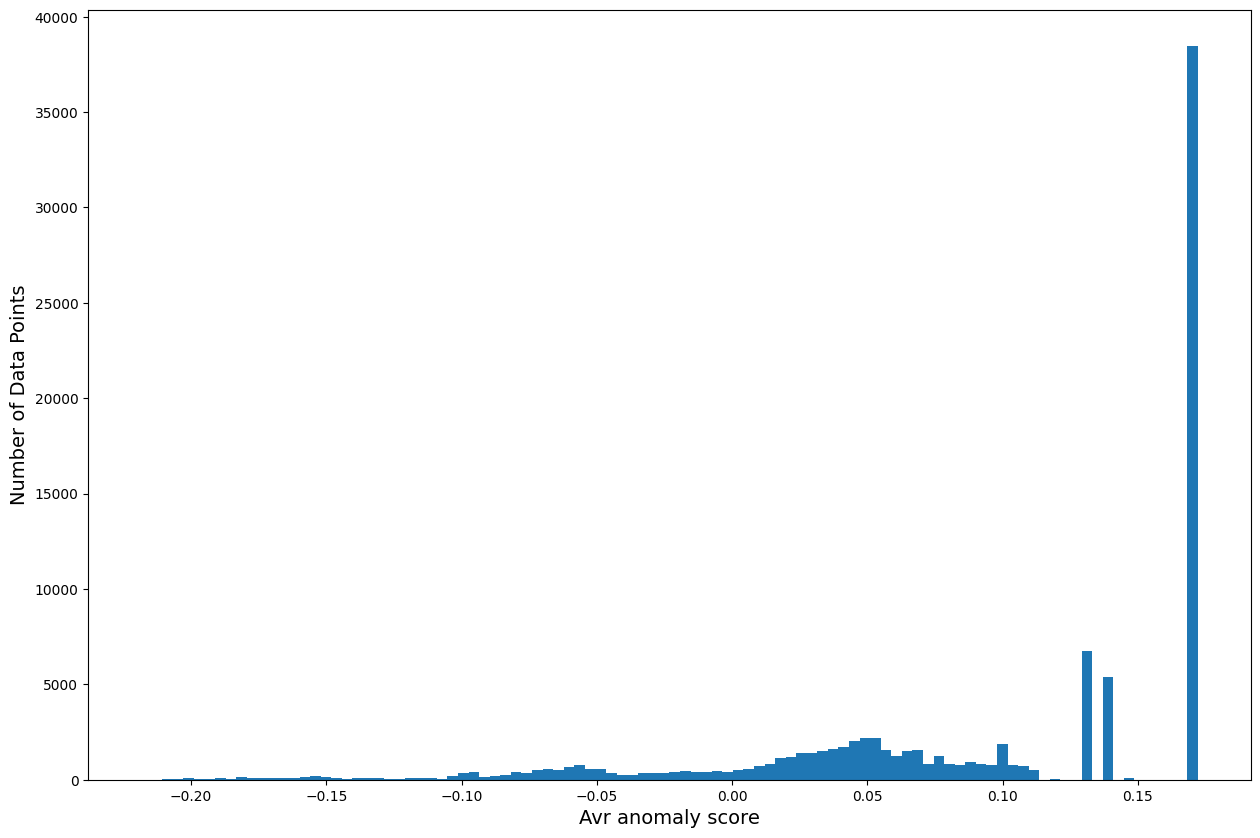

In [ ]:
plt.figure(figsize = (15, 10))

plt.hist(y_pred2, bins=100)

plt.xlabel('Avr anomaly score', fontsize=14)

plt.ylabel('Number of Data Points', fontsize=14)

plt.show()

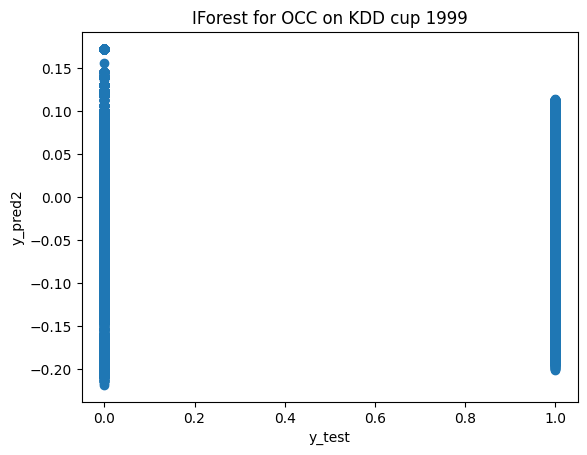

In [ ]:
plt.scatter(y_test, y_pred2)
plt.xlabel('y_test')
plt.ylabel('y_pred2')
plt.title("IForest for OCC on KDD cup 1999")
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Initialize GridSearchCV
grid_search = GridSearchCV(iforest, (x_train, y_train), cv=5, scoring='accuracy')


In [ ]:
grid_search

GridSearchCV(cv=5, estimator=IsolationForest(bootstrap=True, random_state=42),
             param_grid=(array([[ 0., 14.,  9., ...,  0.,  0.,  0.],
       [ 1., 45.,  5., ...,  1.,  0.,  0.],
       [ 1., 45.,  5., ...,  1.,  0.,  0.],
       ...,
       [ 1., 22.,  9., ...,  0.,  0.,  0.],
       [ 0., 14.,  9., ...,  0.,  0.,  0.],
       [ 1., 45.,  5., ...,  1.,  0.,  0.]]),
                         array([0, 0, 0, ..., 1, 0, 0])),
             scoring='accuracy')

In [ ]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)


x_train shape: (395216, 41)
y_train shape: (395216,)


In [ ]:
df.shape

(494020, 41)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 494020 entries, 366667 to 156434
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  object 
 2   service                      494020 non-null  object 
 3   flag                         494020 non-null  object 
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  num_compromised              494020 non-null  int64  

In [ ]:
#grid_search.fit(x_train, y_train)


In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
logreg_model = LogisticRegression()

In [14]:
from sklearn.model_selection import cross_val_score, train_test_split
cv_scores = cross_val_score(logreg_model, x_train, y_train, cv=4)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

Cross-validation scores: [0.9805   0.976875 0.979875 0.981425]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
logreg_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [76]:
data_point_to_predict = x_test[32].reshape(1, -1)
y_pred_log = logreg_model.predict(data_point_to_predict)

In [77]:
y_pred_log

array([2])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already trained your logistic regression model `logreg_model`

# Fit the logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(x_train, y_train)

# Predict using the selected data point
data_point_to_predict = x_test[10].reshape(1, -1)
y_pred_log = logreg_model.predict(data_point_to_predict)

# Calculate confusion matrix
y_pred_all = logreg_model.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred_all)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=y, yticklabels=y)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import classification_report

# Assuming you have already trained your logistic regression model `logreg_model` and made predictions `y_pred_log`

# Assuming you have already imported the necessary libraries and trained your model

# Create predictions for all test data
y_pred_log_all = logreg_model.predict(x_test)

# Print classification report
classification_rep = classification_report(y_test, y_pred_log_all)
print(classification_rep)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       173
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00        90
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           9       0.94      1.00      0.97      8697
          10       0.00      0.00      0.00        22
          11       0.95      0.96      0.96      7893
          13       0.00      0.00      0.00        22
          14       0.24      0.06      0.10        83
          16       0.00      0.00      0.00       137
          17       1.00      1.00      1.00     22714
          18       0.00      0.00      0.00        85
          19       1.00      0.07      0.12        76

    accuracy              

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accuracy = accuracy_score(y_test, y_pred_log)
print("Accuracy:", accuracy)

ValueError: Found input variables with inconsistent numbers of samples: [40000, 1]

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
rf_classifier = RandomForestClassifier()

In [80]:
rf_classifier.fit(x_train, y_train)

<ipython-input-80-7014285d4ab9>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(x_train, y_train)


RandomForestClassifier()

In [85]:
data_point_to_predict = x_test[10].reshape(1, -1)
y_pred_rf = rf_classifier.predict(data_point_to_predict)

In [86]:
y_pred_rf

array([4])

In [ ]:
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

Accuracy: 0.999725


In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
dt_classifier = DecisionTreeClassifier()

In [89]:
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [98]:
data_point_to_predict = x_test[11].reshape(1, -1)
y_pred_dt = dt_classifier.predict(data_point_to_predict)

In [99]:
y_pred_dt

array([2])

In [ ]:
accuracy = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy)

Accuracy: 0.9995


In [ ]:
import xgboost as xgb

In [ ]:
n_features_train = xgb.feature_importances_.shape[0]
n_features_test = x_test.shape[1]

print(f"Number of features in training data: {n_features_train}")
print(f"Number of features in test data: {n_features_test}")

AttributeError: module 'xgboost' has no attribute 'feature_importances_'

In [ ]:
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}")

Shape of x_train: (160000, 41)
Shape of x_test: (40000, 41)


In [ ]:
n_features_train = x_train.shape[1]
n_features_test = x_test.shape[1]

print(f"Number of features in training data: {n_features_train}")
print(f"Number of features in test data: {n_features_test}")

Number of features in training data: 41
Number of features in test data: 42


In [ ]:
x_test.shape

(98804, 41)

In [ ]:
y_test.shape

(98804,)

In [ ]:
from xgboost import XGBClassifier

In [ ]:

xgb_model = xgb.XGBClassifier(objective='binary:logistic', max_depth=3, learning_rate=0.1, n_estimators=100)

In [ ]:

xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
x_test.shape

(98804, 41)

In [ ]:
y_pred_xg = xgb_model.predict(x_test[20:30])

In [ ]:
x_test[0]

array([1.00e+00, 4.50e+01, 5.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.34e+02, 1.10e+01,
       1.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 8.00e-02, 6.00e-02,
       0.00e+00, 2.55e+02, 1.10e+01, 4.00e-02, 5.00e-02, 0.00e+00,
       0.00e+00, 1.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00])

In [ ]:
xgb_model.predict([])

XGBoostError: [07:12:16] /workspace/src/predictor/cpu_predictor.cc:719: Check failed: m->NumColumns() == model.learner_model_param->num_feature (1 vs. 41) : Number of columns in data must equal to trained model.
Stack trace:
  [bt] (0) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x60d4aa) [0x7ce4c63444aa]
  [bt] (1) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x62e114) [0x7ce4c6365114]
  [bt] (2) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x62f5ec) [0x7ce4c63665ec]
  [bt] (3) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x45c6fa) [0x7ce4c61936fa]
  [bt] (4) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x4beada) [0x7ce4c61f5ada]
  [bt] (5) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x16d67e) [0x7ce4c5ea467e]
  [bt] (6) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(XGBoosterPredictFromDense+0x2ab) [0x7ce4c5ea4dcb]
  [bt] (7) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7ce554d08e2e]
  [bt] (8) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7ce554d05493]



In [ ]:
y_pred_xg

array([17,  9, 17, 11, 17,  9,  9, 17,  9, 17])

In [ ]:
accuracy = accuracy_score(y_test, y_pred_xg)
print("Accuracy:", accuracy)

ValueError: Found input variables with inconsistent numbers of samples: [40000, 10]

In [ ]:
x_test[20:30]

array([[0.0000e+00, 1.4000e+01, 9.0000e+00, 0.0000e+00, 1.0320e+03,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 5.1100e+02, 5.1100e+02, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 2.5500e+02, 2.5500e+02, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [0.0000e+00, 1.4000e+01, 9.0000e+00, 0.0000e+00, 5.2000e+02,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 5.1100e+02, 5.1100e+02, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 2.5500e

In [ ]:
import seaborn as sns

In [ ]:
correlation_matrix = df.corr()

<ipython-input-34-68bbfff3c4eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [ ]:
plt.figure(figsize=(30,18))

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

<ipython-input-40-21546e337f6d>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


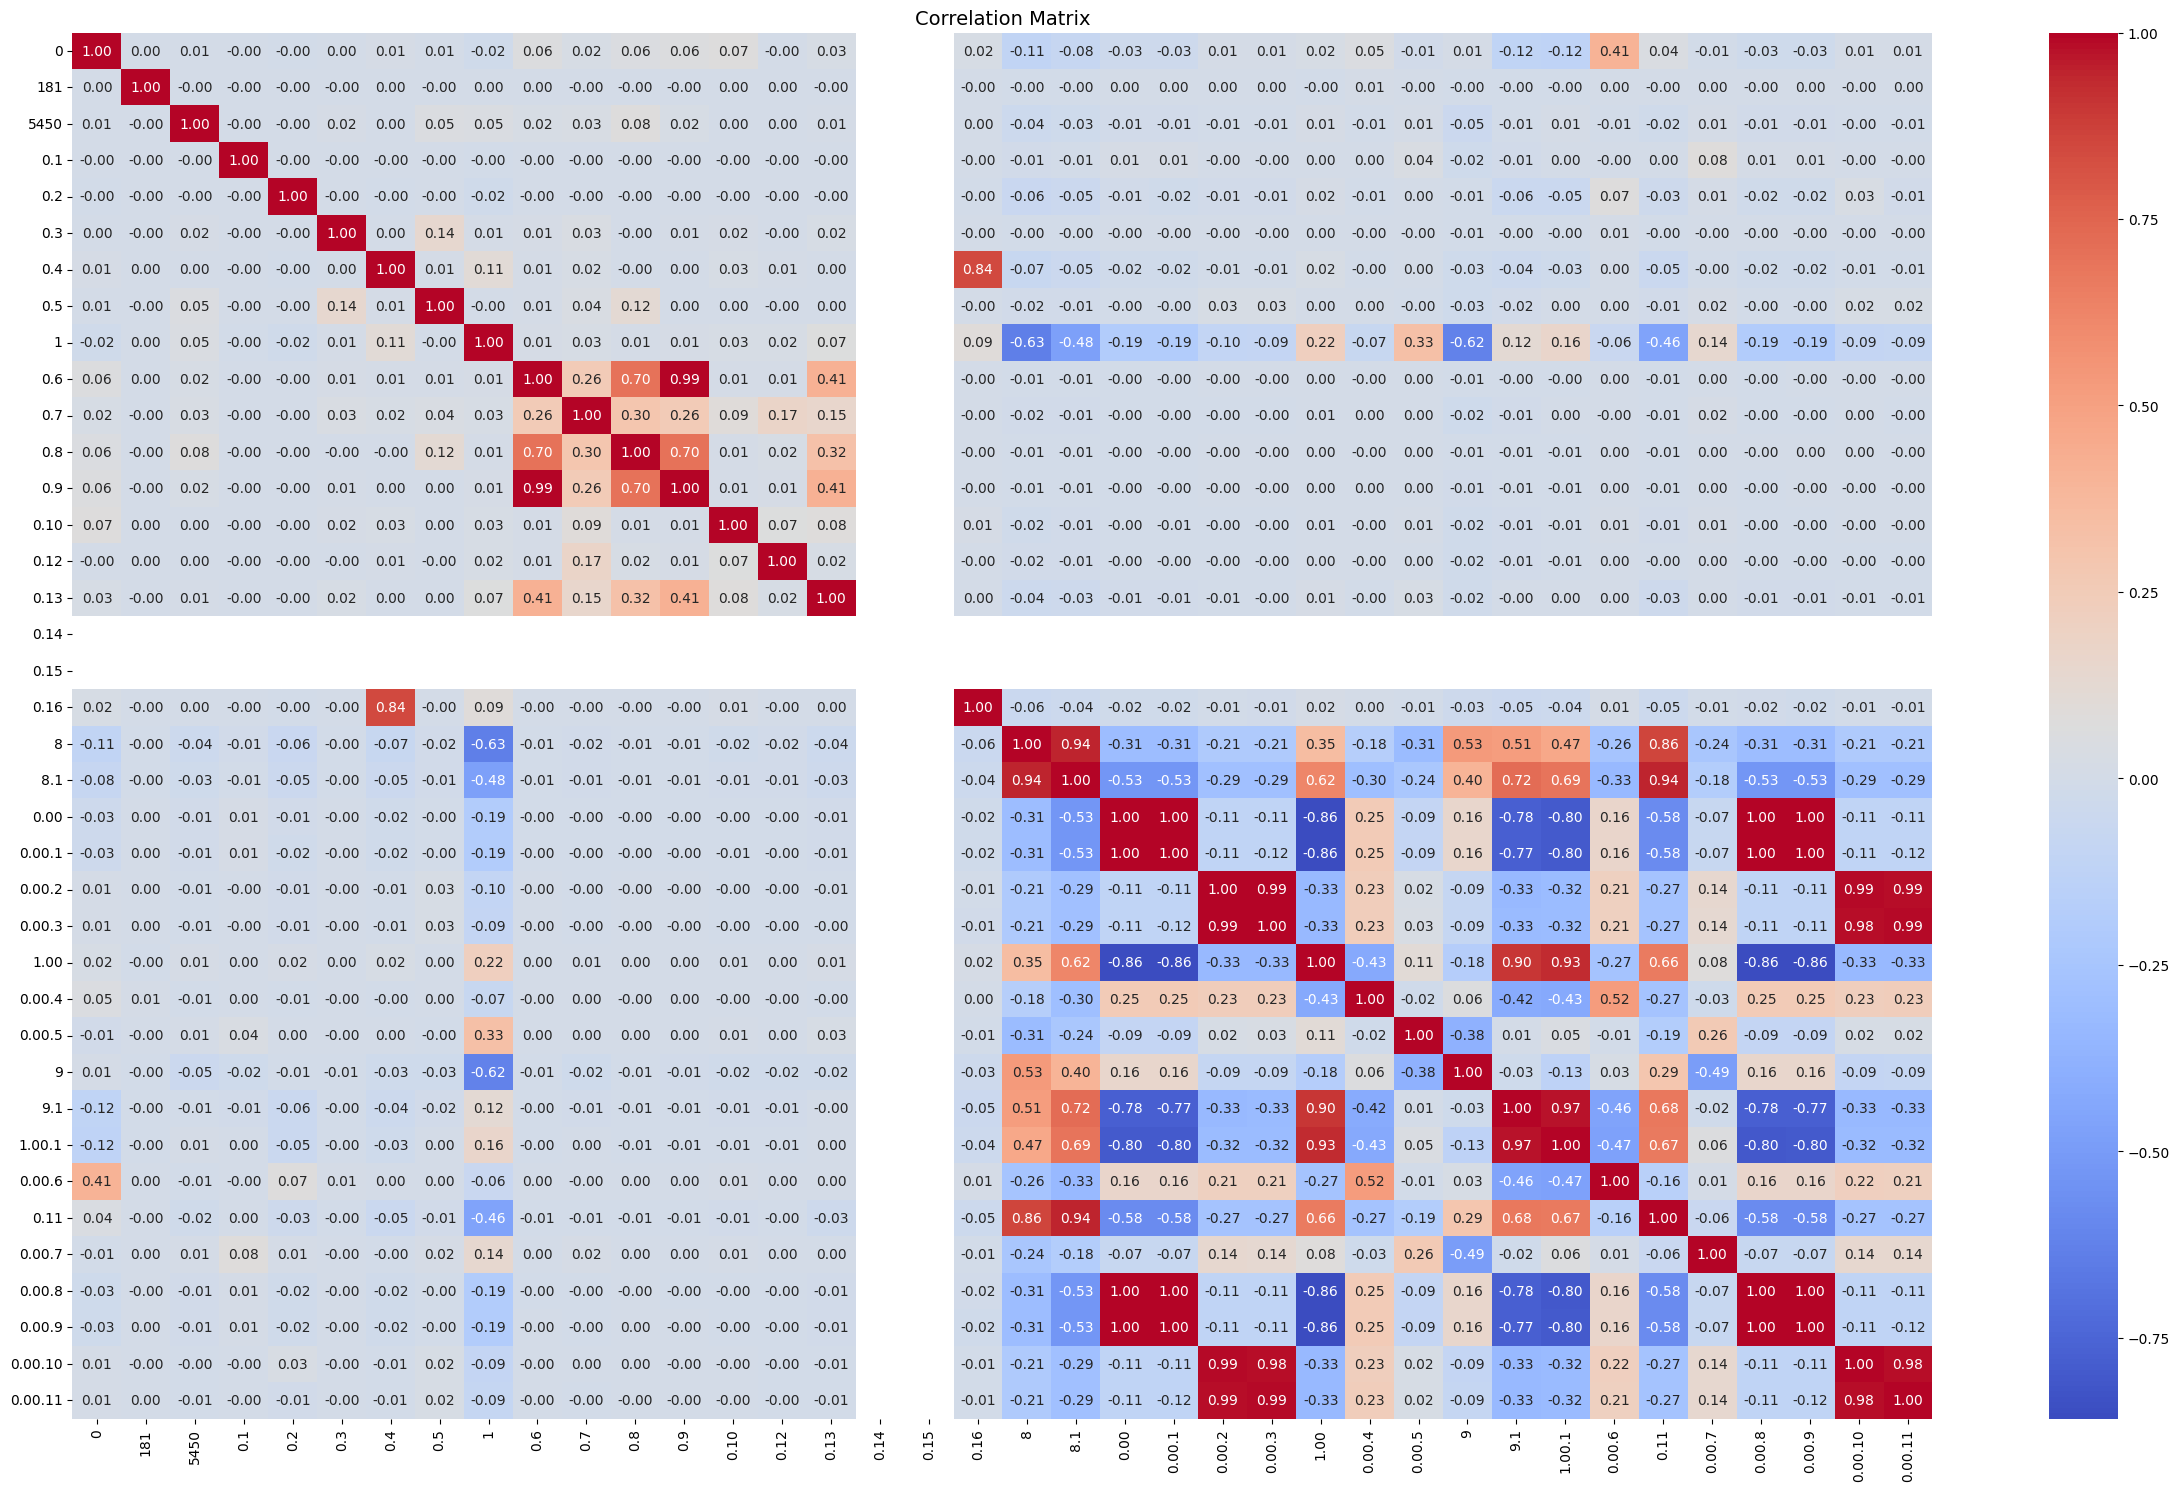

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Compute the correlation matrix using pandas
correlation_matrix = df.corr()

# Increase the size of the plot
plt.figure(figsize=(30, 18))

# Plot the correlation matrix using seaborn
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 10}, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix', fontsize=14)
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder



In [ ]:
label_encoder.fit(y_train)

LabelEncoder()

In [ ]:

x_test

array([[ 1., 45.,  5., ...,  1.,  0.,  0.],
       [ 0., 14.,  9., ...,  0.,  0.,  0.],
       [ 0., 14.,  9., ...,  0.,  0.,  0.],
       ...,
       [ 0., 14.,  9., ...,  0.,  0.,  0.],
       [ 0., 14.,  9., ...,  0.,  0.,  0.],
       [ 0., 14.,  9., ...,  0.,  0.,  0.]])

In [ ]:
y_pred_log_df = pd.DataFrame(y_pred_log, columns=['y_pred'])

In [ ]:
y_pred_log_df = y_pred_log_df.to_numpy()

In [ ]:
x_test = np.concatenate([x_test, y_pred_log_df], axis=1)

In [ ]:
x_test

array([[ 1., 45.,  5., ...,  0.,  0.,  0.],
       [ 0., 14.,  9., ...,  0.,  0.,  0.],
       [ 0., 14.,  9., ...,  0.,  0.,  0.],
       ...,
       [ 0., 14.,  9., ...,  0.,  0.,  0.],
       [ 0., 14.,  9., ...,  0.,  0.,  0.],
       [ 0., 14.,  9., ...,  0.,  0.,  0.]])

In [ ]:
print(x_test)

[[ 1. 45.  5. ...  0.  0.  0.]
 [ 0. 14.  9. ...  0.  0.  0.]
 [ 0. 14.  9. ...  0.  0.  0.]
 ...
 [ 0. 14.  9. ...  0.  0.  0.]
 [ 0. 14.  9. ...  0.  0.  0.]
 [ 0. 14.  9. ...  0.  0.  0.]]


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
288420,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
344329,0,udp,domain_u,SF,42,42,0,0,0,0,...,245,0.96,0.01,0.0,0.0,0.0,0.0,0.0,0.0,normal.
319989,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
448758,0,icmp,ecr_i,SF,520,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
56639,0,tcp,private,S0,0,0,0,0,0,0,...,7,0.03,0.08,0.0,0.0,1.0,1.0,0.0,0.0,neptune.


In [ ]:
x_test

array([[ 1., 45.,  5., ...,  0.,  0.,  0.],
       [ 0., 14.,  9., ...,  0.,  0.,  0.],
       [ 0., 14.,  9., ...,  0.,  0.,  0.],
       ...,
       [ 0., 14.,  9., ...,  0.,  0.,  0.],
       [ 0., 14.,  9., ...,  0.,  0.,  0.],
       [ 0., 14.,  9., ...,  0.,  0.,  0.]])

In [ ]:
x_test[:, -1]

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
!pip install joblib

In [ ]:
from sklearn.externals import joblib

ImportError: cannot import name 'joblib' from 'sklearn.externals' (/usr/local/lib/python3.10/dist-packages/sklearn/externals/__init__.py)

In [ ]:
string=['a', 'b','c','d','e','f','g','h']
for(i=0;i<8;i++)

print(string[i], string[i+3], string[i+6])

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (<ipython-input-1-da6d389d7eff>, line 2)